<a href="https://colab.research.google.com/github/prajwalDU/Bike-sharing-demand-prdiction-prajwal/blob/main/Final_Bike_Sharing_Demand_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Seoul Bike Sharing Demand Prediction </u></b>

### <b> Problem Description </b>

### Currently Rental bikes are introduced in many urban cities for the enhancement of mobility comfort. It is important to make the rental bike available and accessible to the public at the right time as it lessens the waiting time. Eventually, providing the city with a stable supply of rental bikes becomes a major concern. The crucial part is the prediction of bike count required at each hour for the stable supply of rental bikes.


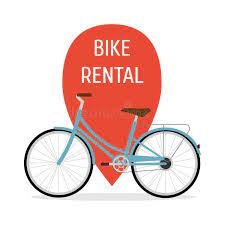

# **Data Description**

<b> The dataset contains weather information (Temperature, Humidity, Windspeed, Visibility, Dewpoint, Solar radiation, Snowfall, Rainfall), the number of bikes rented per hour and date information.</b>


<b>Attribute Information: </b>

*  ### Date : year-month-day
* ### Rented Bike count - Count of bikes rented at each hour
* ### Hour - Hour of he day
* ### Temperature-Temperature in Celsius
* ### Humidity - %
* ### Windspeed - m/s
* ### Visibility - 10m
* ### Dew point temperature - Celsius
* ### Solar radiation - MJ/m2
* ### Rainfall - mm
* ### Snowfall - cm
* ### Seasons - Winter, Spring, Summer, Autumn
* ### Holiday - Holiday/No holiday
* ### Functional Day - NoFunc(Non Functional Hours), Fun(Functional hours)

In [1]:
# Importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mounting drive to load data
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Importing dataset
data = pd.read_csv('/content/drive/MyDrive/almabetter/ML/Bike sharing regression/SeoulBikeData.csv', encoding = 'latin', parse_dates=['Date'])

In [4]:
# Check first 5 rows of dataset
data.head()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,2017-01-12,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,2017-01-12,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
2,2017-01-12,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,Winter,No Holiday,Yes
3,2017-01-12,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
4,2017-01-12,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
# Check last 5 rows of dataset
data.tail()

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
8755,2018-11-30,1003,19,4.2,34,2.6,1894,-10.3,0.0,0.0,0.0,Autumn,No Holiday,Yes
8756,2018-11-30,764,20,3.4,37,2.3,2000,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8757,2018-11-30,694,21,2.6,39,0.3,1968,-9.9,0.0,0.0,0.0,Autumn,No Holiday,Yes
8758,2018-11-30,712,22,2.1,41,1.0,1859,-9.8,0.0,0.0,0.0,Autumn,No Holiday,Yes
8759,2018-11-30,584,23,1.9,43,1.3,1909,-9.3,0.0,0.0,0.0,Autumn,No Holiday,Yes


In [6]:
# Check the shape of dataset
data.shape

(8760, 14)

In [7]:
# To get easy way to familiar with dataset is checking dataset info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   Date                       8760 non-null   datetime64[ns]
 1   Rented Bike Count          8760 non-null   int64         
 2   Hour                       8760 non-null   int64         
 3   Temperature(°C)            8760 non-null   float64       
 4   Humidity(%)                8760 non-null   int64         
 5   Wind speed (m/s)           8760 non-null   float64       
 6   Visibility (10m)           8760 non-null   int64         
 7   Dew point temperature(°C)  8760 non-null   float64       
 8   Solar Radiation (MJ/m2)    8760 non-null   float64       
 9   Rainfall(mm)               8760 non-null   float64       
 10  Snowfall (cm)              8760 non-null   float64       
 11  Seasons                    8760 non-null   object        
 12  Holida

In [8]:
# Another way to get familiar with dataset is checking describe
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Rented Bike Count,8760.0,704.602055,644.997468,0.0,191.00,504.50,1065.25,3556.00
Hour,8760.0,11.500000,6.922582,0.0,5.75,11.50,17.25,23.00
Temperature(°C),8760.0,12.882922,11.944825,-17.8,3.50,13.70,22.50,39.40
Humidity(%),8760.0,58.226256,20.362413,0.0,42.00,57.00,74.00,98.00
Wind speed (m/s),8760.0,1.724909,1.036300,0.0,0.90,1.50,2.30,7.40
Visibility (10m),8760.0,1436.825799,608.298712,27.0,940.00,1698.00,2000.00,2000.00
Dew point temperature(°C),8760.0,4.073813,13.060369,-30.6,-4.70,5.10,14.80,27.20
Solar Radiation (MJ/m2),8760.0,0.569111,0.868746,0.0,0.00,0.01,0.93,3.52
Rainfall(mm),8760.0,0.148687,1.128193,0.0,0.00,0.00,0.00,35.00
Snowfall (cm),8760.0,0.075068,0.436746,0.0,0.00,0.00,0.00,8.80


In [9]:
# Check sum of null values in each columns
data.isna().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(°C)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(°C)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

# **EDA**

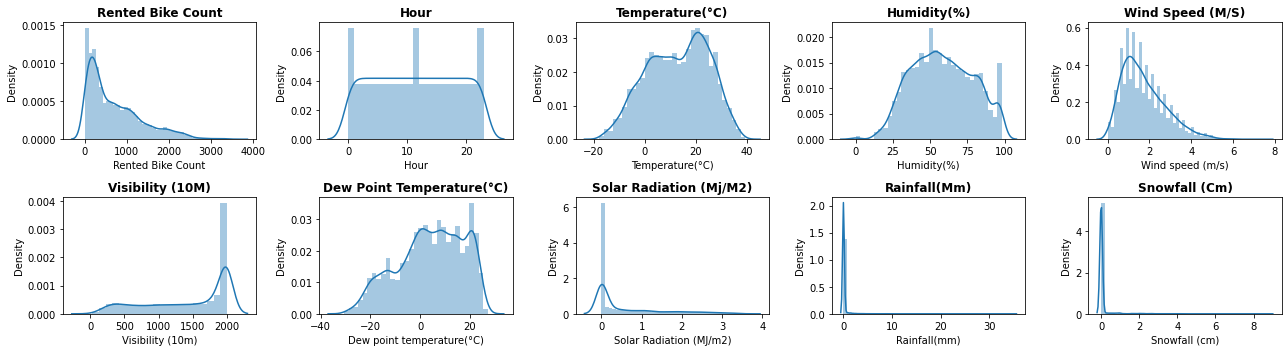

In [10]:
# Visualizing the distribution
plt.figure(figsize=(18,5))
for n, column in enumerate(data.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.distplot(data[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

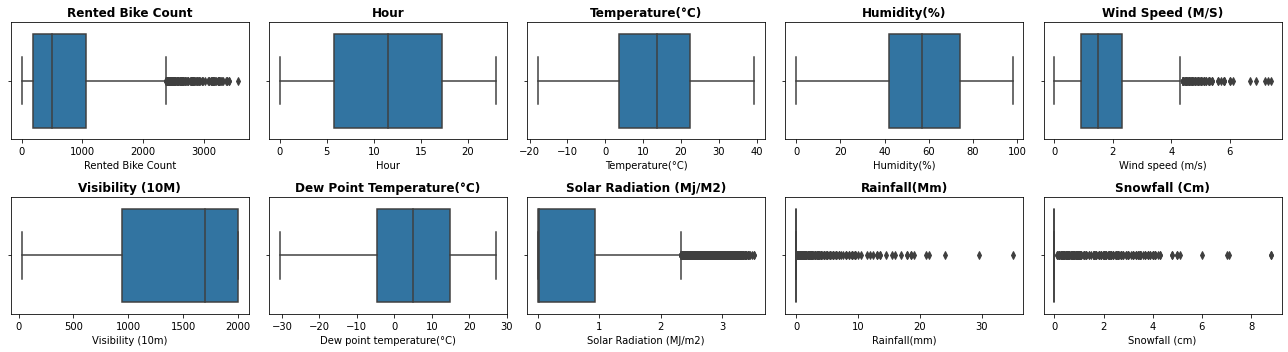

In [11]:
# Visiualizing in boxplot is easyway to find outliers in our dataset
plt.figure(figsize=(18,5))
for n, column in enumerate(data.describe().columns):
  plt.subplot(2, 5, n+1)
  sns.boxplot(data[column])
  plt.title(f'{column.title()}', fontweight='bold')
  plt.tight_layout()

In [12]:
# Removing outliers by using IQR method:
q1, q3, median = data['Rented Bike Count'].quantile([0.25,0.75,0.5])
lower_limit = q1 - 1.5*(q3-q1)
upper_limit = q3 + 1.5*(q3-q1)
data['Rented Bike Count'] = np.where(data['Rented Bike Count'] > upper_limit, median, np.where(
                              data['Rented Bike Count'] < lower_limit, median, data['Rented Bike Count']))

# Removing outliers by capping
for col in ['Wind speed (m/s)', 'Solar Radiation (MJ/m2)', 'Rainfall(mm)', 'Snowfall (cm)']:
  upper_limit = data[col].quantile(0.99)
  data[col] = np.where(data[col] > upper_limit, upper_limit, data[col])

In [13]:
# Creating new features from date and hour column
data['weekend'] = data['Date'].apply(lambda x : 1 if (x.day_name()=='Saturday' or x.day_name()=='Sunday') else 0)
data['timeshift'] = data['Hour'].apply(lambda x: 'night' if 0<=x<=6 else ('day' if 7<=x<=16 else 'evening'))

In [14]:
# Droping date column
data.drop(columns=['Date'], inplace=True)

In [15]:
# Let's take care of categorical columns
categorical_features = [i for i in data.columns if i not in data.describe().columns]
categorical_features

['Seasons', 'Holiday', 'Functioning Day', 'timeshift']

In [16]:
for col in categorical_features:
  print(data[col].value_counts(), '\n')

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64 

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64 

Yes    8465
No      295
Name: Functioning Day, dtype: int64 

day        3650
night      2555
evening    2555
Name: timeshift, dtype: int64 



In [17]:
# Defining label encoder based on above data
encoder = {'Holiday' : {'Holiday':1, 'No Holiday':0},
           'Functioning Day' : {'Yes':1, 'No':0},
           'timeshift' : {'night':0, 'day':1, 'evening':2}}
    
# Replacing our dataset with label encoding
data = data.replace(encoder)

In [18]:
# Apply one hot encoding on seasons column
data = pd.get_dummies(data, columns=['Seasons'], prefix='', prefix_sep='')

In [19]:
# Looking our new dataset
data.head()

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekend,timeshift,Autumn,Spring,Summer,Winter
0,254.0,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
1,204.0,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
2,173.0,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,0,0,1
3,107.0,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1
4,78.0,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,0,0,1


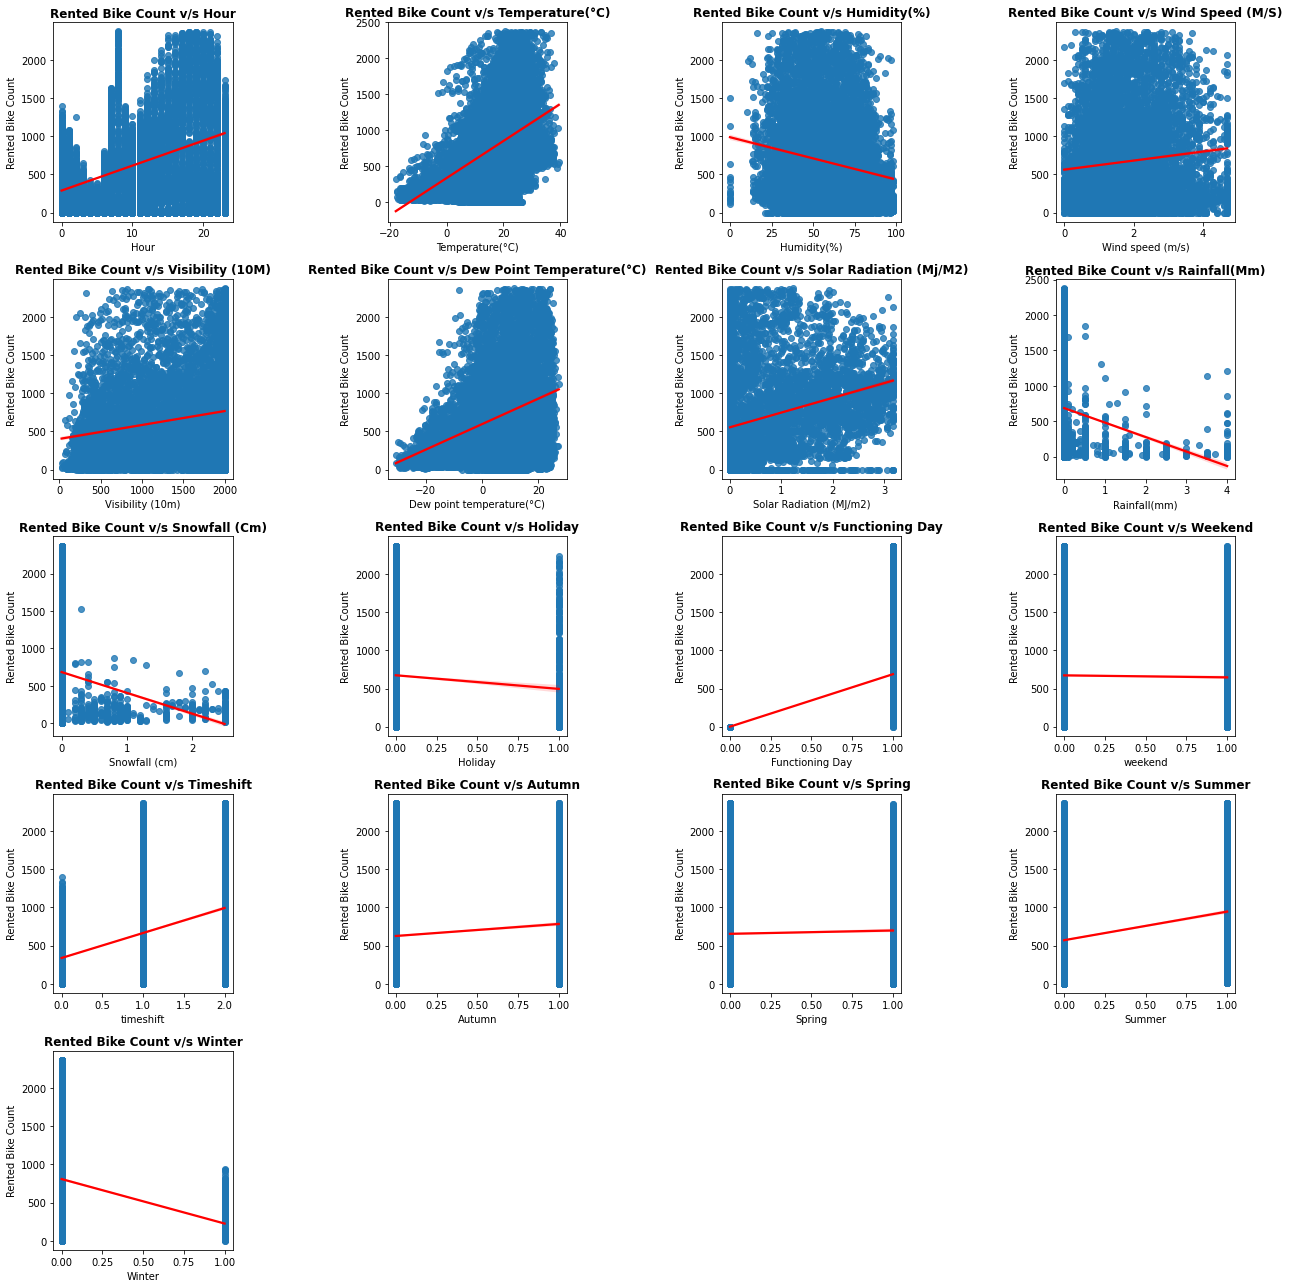

In [20]:
# Creat independent variables
independent_variables = [i for i in data.columns if i not in ['Rented Bike Count']]

# Check linearity
plt.figure(figsize=(18,18))
for n,column in enumerate(independent_variables):
  plt.subplot(5, 4, n+1)
  sns.regplot(data = data, x=column, y='Rented Bike Count', line_kws={"color":"red"})
  plt.title(f'Rented Bike Count v/s {column.title()}', fontweight='bold')
  plt.tight_layout()

In [21]:
# Check skewness of all columns
data.skew().sort_values(ascending=True)

Functioning Day             -5.170969
Visibility (10m)            -0.701786
Dew point temperature(°C)   -0.367298
Temperature(°C)             -0.198326
Hour                         0.000000
timeshift                    0.000000
Humidity(%)                  0.059579
Wind speed (m/s)             0.771688
weekend                      0.923555
Rented Bike Count            0.983470
Spring                       1.142294
Summer                       1.142294
Autumn                       1.159123
Winter                       1.176139
Solar Radiation (MJ/m2)      1.488480
Holiday                      4.163603
Snowfall (cm)                5.995525
Rainfall(mm)                 6.304076
dtype: float64

As we seen above negative('-') symbol data tell negatively skewed and positively skewed data are above 0.00.        
So we use log tranfer to get symmetric type data


## **Checking and Removing multicollinearity**

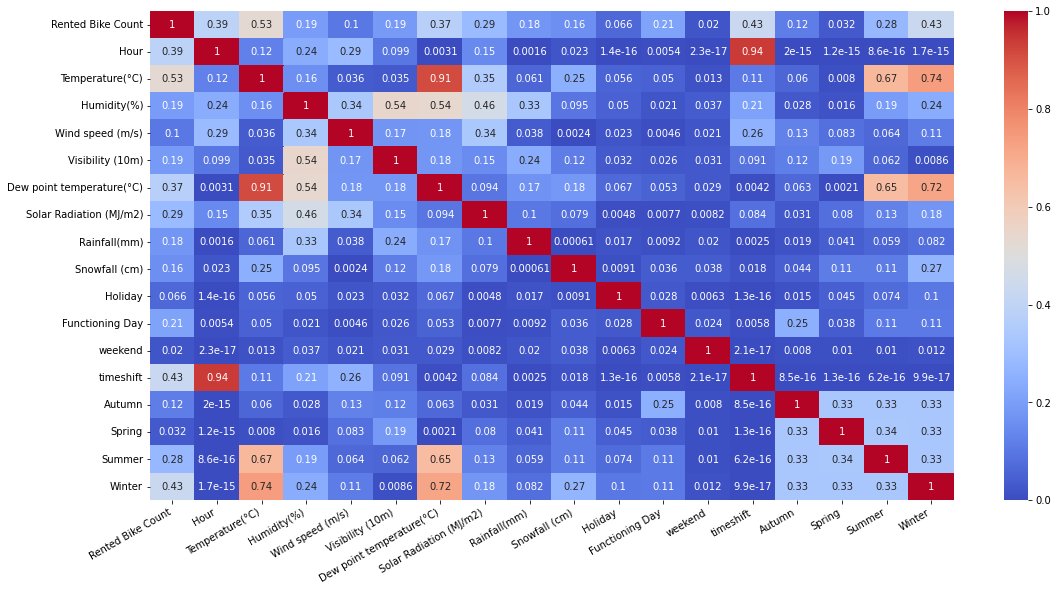

In [22]:
# Check corelations with heatmap
plt.figure(figsize=(18,9))
plot = sns.heatmap(abs(data.corr()), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [23]:
# import vif 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Write a function for variance inflation factor(VIF)
def cal_vif(X):
  vif = pd.DataFrame()
  vif['variables'] = X.columns
  vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return(vif.sort_values(by='VIF', ascending=False).reset_index(drop=True))

In [24]:
# Check VIF for each variable
independent_variables = [i for i in data.columns if i not in ['Rented Bike Count']]
cal_vif(data[independent_variables])

,variables,VIF
0,Dew point temperature(°C),119.298136
1,Summer,116.141121
2,Spring,112.673201
3,Autumn,110.725563
4,Winter,107.844468
5,Temperature(°C),90.833188
6,Humidity(%),21.238433
7,Hour,8.781649
8,timeshift,8.555039
9,Solar Radiation (MJ/m2),2.078721


In [25]:
independent_variables = [i for i in data.columns if i not in ['Rented Bike Count', 'Dew point temperature(°C)', 'Summer', 'Winter', 'Humidity(%)', 'Hour']]
cal_vif(data[independent_variables])

,variables,VIF
0,Functioning Day,8.973136
1,Visibility (10m),6.903425
2,Wind speed (m/s),4.784533
3,timeshift,2.956516
4,Temperature(°C),2.685255
5,Solar Radiation (MJ/m2),1.944365
6,Spring,1.528702
7,Autumn,1.468795
8,weekend,1.396051
9,Snowfall (cm),1.131983


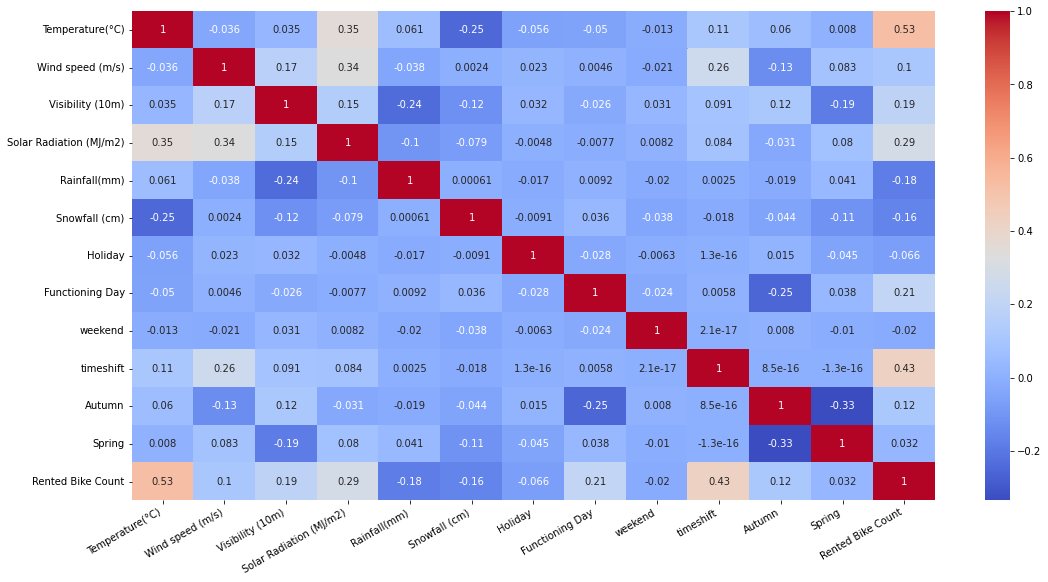

In [26]:
# Updating dataset
df = data[independent_variables + ['Rented Bike Count']]

# Checking corelation
plt.figure(figsize=(18,9))
plot = sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plot.set_xticklabels(plot.get_xticklabels(), rotation=30, horizontalalignment='right')
plt.show()

In [27]:
df.head()

,Temperature(°C),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,weekend,timeshift,Autumn,Spring,Rented Bike Count
0,-5.2,2.2,2000,0.0,0.0,0.0,0,1,0,0,0,0,254.0
1,-5.5,0.8,2000,0.0,0.0,0.0,0,1,0,0,0,0,204.0
2,-6.0,1.0,2000,0.0,0.0,0.0,0,1,0,0,0,0,173.0
3,-6.2,0.9,2000,0.0,0.0,0.0,0,1,0,0,0,0,107.0
4,-6.0,2.3,2000,0.0,0.0,0.0,0,1,0,0,0,0,78.0


Know let's move the Fun part

# **Model Building**

In [28]:
# Importing packages
from sklearn import preprocessing
from sklearn import linear_model 

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor

Before we move modeling part we has to scale our dataset

In [29]:
# Scaling dataset
scaler = MinMaxScaler()

# Dividing dataset into independent and dependent variables
y = np.sqrt(df['Rented Bike Count'])
features = [i for i in data.columns if i not in ['Rented Bike Count']]

In [30]:
# Defining a function to train the input model and print evaluation matrix
def analyse_model(model, X_train, X_test, y_train, y_test):

  '''
  Fitting model to test multiple algorithms to find which algorithms gives best result
  write evaluation matrix which contains mse,rmse,r2,etc
  finally we plot the result and return
  '''

  # Fit the model
  model.fit(X_train,y_train)
  y_pred = model.predict(X_test)
  a,p = y_test**2,y_pred**2

  # Calculate Evaluation Matrix
  mse = mean_squared_error(a,p)
  rmse = np.sqrt(mse)
  r2 = r2_score(a,p)
  try:
    importance = model.feature_importances_
    feature = features
  except:
    importance = np.abs(model.coef_)
    feature = independent_variables
  indices = np.argsort(importance)
  indices = indices[::-1]

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mean_absolute_error(a,p))
  print("Train R2 :", r2_score(y_train**2,model.predict(X_train)**2))
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1)))

  # Plot actual and predicted values and the feature importances:
  plt.figure(figsize=(18,6))
  plt.subplot(2,1,1)
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Bike Counts')
  plt.subplot(2,1,2)
  plt.bar(range(len(indices)),importance[indices])
  plt.xticks(range(len(indices)), [feature[i] for i in indices])
  plt.title('Feature Importance')
  plt.tight_layout()
  plt.show()

  return model

In [31]:
# Providing the range of values for hyperparameters such as number of trees
n_estimators = [50, 100, 150]

# Maximum depth of trees
max_depth = [6, 8, 10]

# Minimum number of samples required to split a mode
min_sample_split = [50, 100, 150]

# Minimum number of samples required to split a mode
min_sample_leaf = [40, 50]

# Learning rate
eta = [0.08, 0.05, 0.1]

## **Linear Regression**

In [32]:
# Split dataset into train and test set
X = scaler.fit_transform(data[independent_variables])
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=0)

MSE : 137241.3084686744
RMSE : 370.46094054390454
MAE : 254.74045552944642
Train R2 : 0.5837621350247335
Test R2 : 0.5924062591863408
Adjusted R2 :  0.5895936514291448


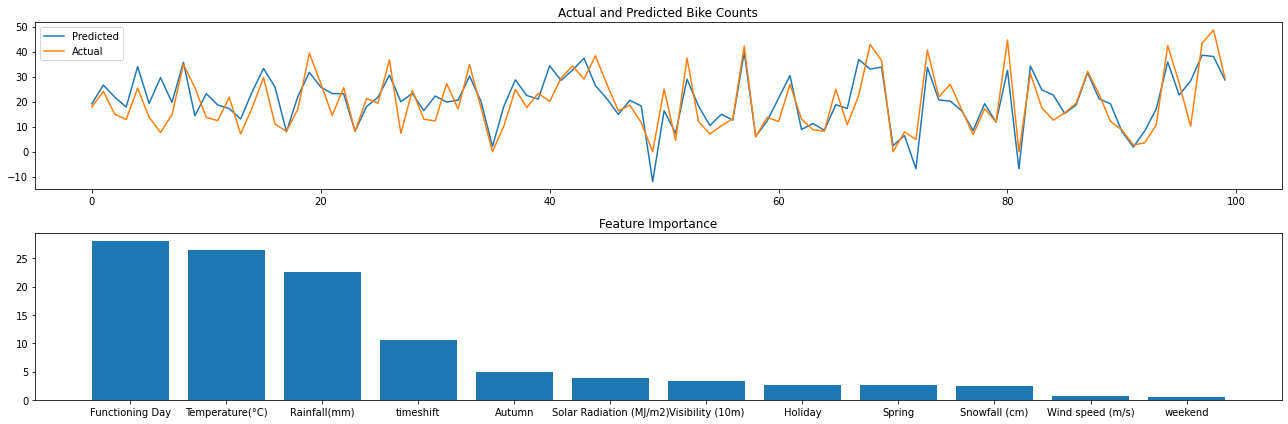

LinearRegression()

In [33]:
# Fit linear regressor
lr_model = LinearRegression()
analyse_model(lr_model, X_train, X_test, y_train, y_test)

## **Decision Tree Regressor**

In [34]:
# Split data into train and test by redefining X
X = scaler.fit_transform(data[features])
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size = 0.2, random_state = 0)

MSE : 91524.53332018365
RMSE : 302.53021885455286
MAE : 188.5071046099557
Train R2 : 0.7598960015979025
Test R2 : 0.7281807691252598
Adjusted R2 :  0.7255158747049192


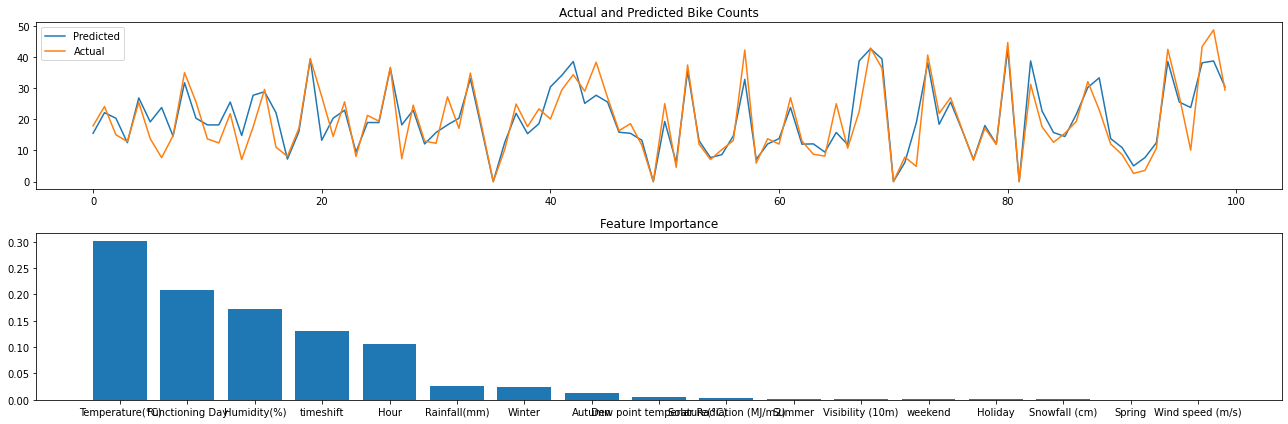

DecisionTreeRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
                      random_state=1)

In [35]:
# Fit decision tree regressor
decisiontree = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : max_depth,
         'min_samples_split' : min_sample_split,
         'min_samples_leaf' : min_sample_leaf}

# GridSearchCV to find best parameters
dt = GridSearchCV(decisiontree, grid, scoring='r2', cv=5)
dt.fit(X_train, y_train)

# Analysing model with best set of parametes
analyse_model(dt.best_estimator_, X_train, X_test, y_train, y_test)

## **Random Forest Regressor**

MSE : 84477.97071442586
RMSE : 290.6509430819481
MAE : 178.33471198158574
Train R2 : 0.773708008017987
Test R2 : 0.7491083953946788
Adjusted R2 :  0.746648673780901


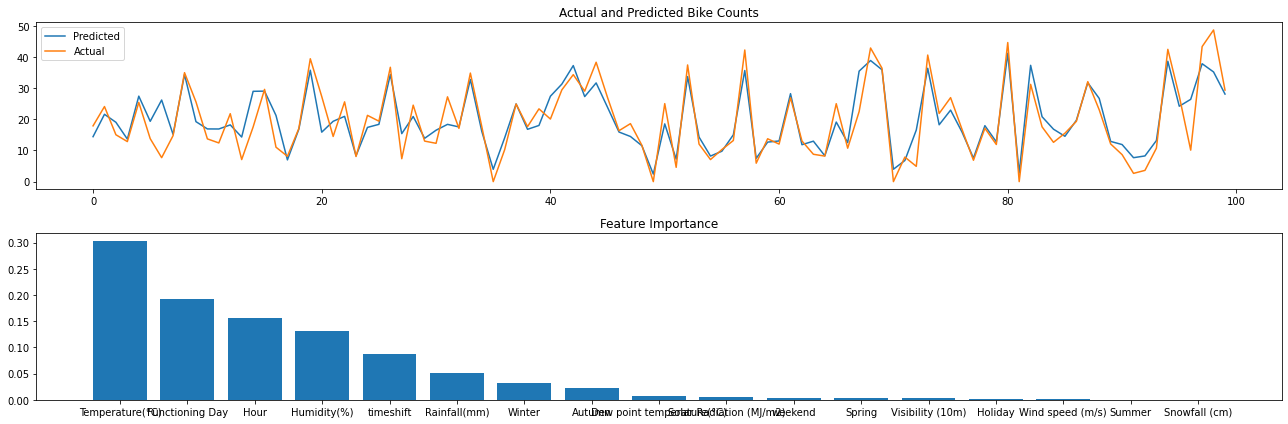

RandomForestRegressor(max_depth=10, min_samples_leaf=40, min_samples_split=50,
                      n_estimators=150)

In [36]:
# Fit regressor
regressor = RandomForestRegressor()

# Hyperparameter grid
grid = {'n_estimators' : n_estimators,
         'max_depth' : max_depth,
         'min_samples_split': min_sample_split,
         'min_samples_leaf': min_sample_leaf}

# GridSearchCV to find best parameters
rf = GridSearchCV(regressor, param_grid=grid, scoring='r2',cv=5)
rf.fit(X_train,y_train)

# Analysing model with best set of parametes
analyse_model(rf.best_estimator_, X_train, X_test, y_train, y_test)

## **XGBoost Regressor**

MSE : 58913.99867290589
RMSE : 242.72206054025227
MAE : 134.1361227702089
Train R2 : 0.961794302333021
Test R2 : 0.825030981026666
Adjusted R2 :  0.8233155984877119


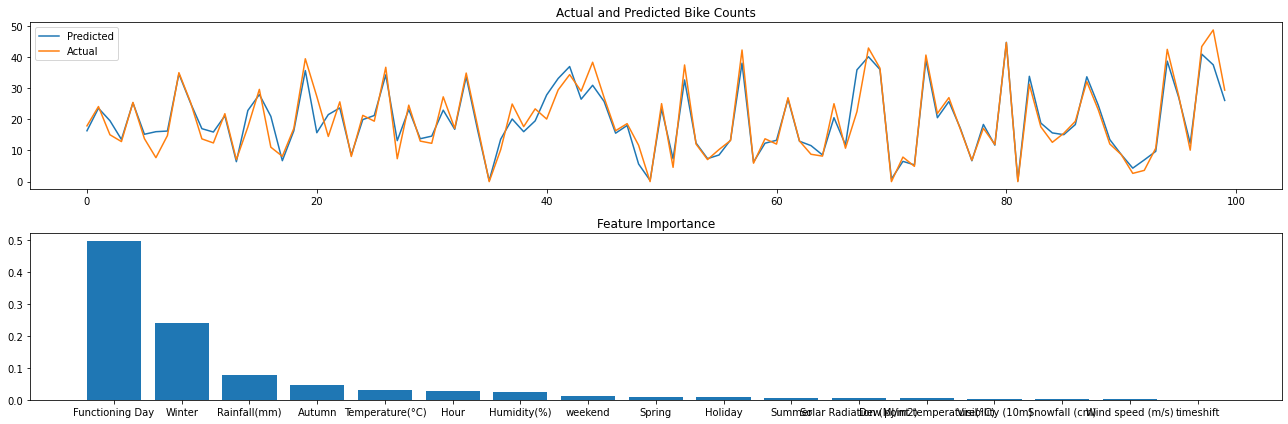

XGBRegressor(eta=0.08, max_depth=8, min_samples_leaf=40, min_samples_split=50,
             n_estimators=150, random_state=3, silent=True)

In [37]:
# Fit xgb
regressor = XGBRegressor(silent=True, random_state=3)

# Hyperparameter param
param = {'n_estimators' : n_estimators,
         'max_depth' : max_depth,
         'min_samples_split': min_sample_split,
         'min_samples_leaf': min_sample_leaf,
         'eta' : eta}

# GridSearchCV to find best parameters
xgb = GridSearchCV(regressor, param_grid=param, scoring='neg_mean_squared_error',cv=5)
xgb.fit(X_train, y_train)

# Analysing model with best set of parametes
analyse_model(xgb.best_estimator_, X_train, X_test, y_train, y_test)

## **GradientBoosting Regressor**

MSE : 61590.84383506893
RMSE : 248.17502661442174
MAE : 141.19772490222155
Train R2 : 0.9078337007467008
Test R2 : 0.8170810033894738
Adjusted R2 :  0.8152876798932921


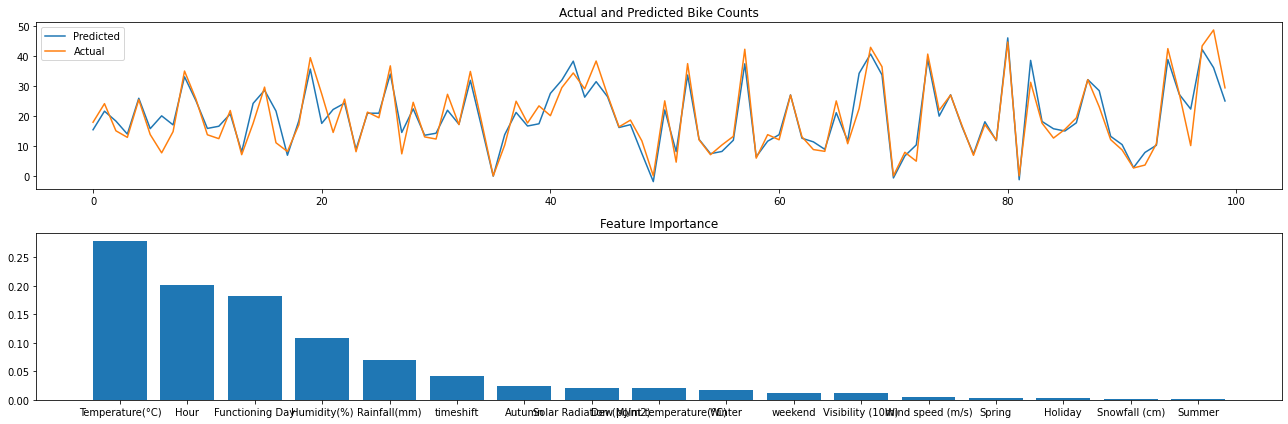

GradientBoostingRegressor(max_depth=10, min_samples_leaf=50,
                          min_samples_split=50, n_estimators=150,
                          random_state=4)

In [38]:
# Fit Regressor
regressor = GradientBoostingRegressor(random_state=4)

# HYperparameter Grid
param = {'n_estimators' : n_estimators,
        'max_depth' : max_depth,
        'min_samples_split' : min_sample_split,
        'min_samples_leaf' : min_sample_leaf}

# GridSearch to find the best parameters
gbr = GridSearchCV(regressor, param_grid = param, scoring = 'neg_mean_squared_error', cv=5)
gbr.fit(X_train, y_train)

# Analysing model with best set of parametes
analyse_model(gbr.best_estimator_, X_train, X_test, y_train, y_test)

# **Conclusion**

Functioning day is the most influencing feature and temperature is at the second place for LinearRegressor.          
Temperature is the most important feature for DecisionTree, RandomForest and GradientBoosting Regressor.                
Functioning day is the most important feature and Winter is the second most for XGBoostRegressor.              
RMSE Comparisons:

LinearRegressor RMSE : 370.46         
DecissionTreeRegressor RMSE : 302.53           
RandomForestRegressor RMSE : 290.02          
XGBoostRegressor RMSE : 242.72           
GradientBoostingRegressor RMSE : 248.18         
The feature temperature is on the top list for all the regressors except XGBoost.

XGBoost is acting different from all the regressors as it is considering whether it is winter or not. And is it a working day or not. Though winter is also a function of temperature only but it seems this trick of XGBoost is giving better results.                 
XGBoostRegressor has the Least Root Mean Squared Error. So It can be considered as the best model for given problem.